<a href="https://colab.research.google.com/github/irinakozub/company_financial_condition/blob/main/google_colab_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# google_docs_saving_data()

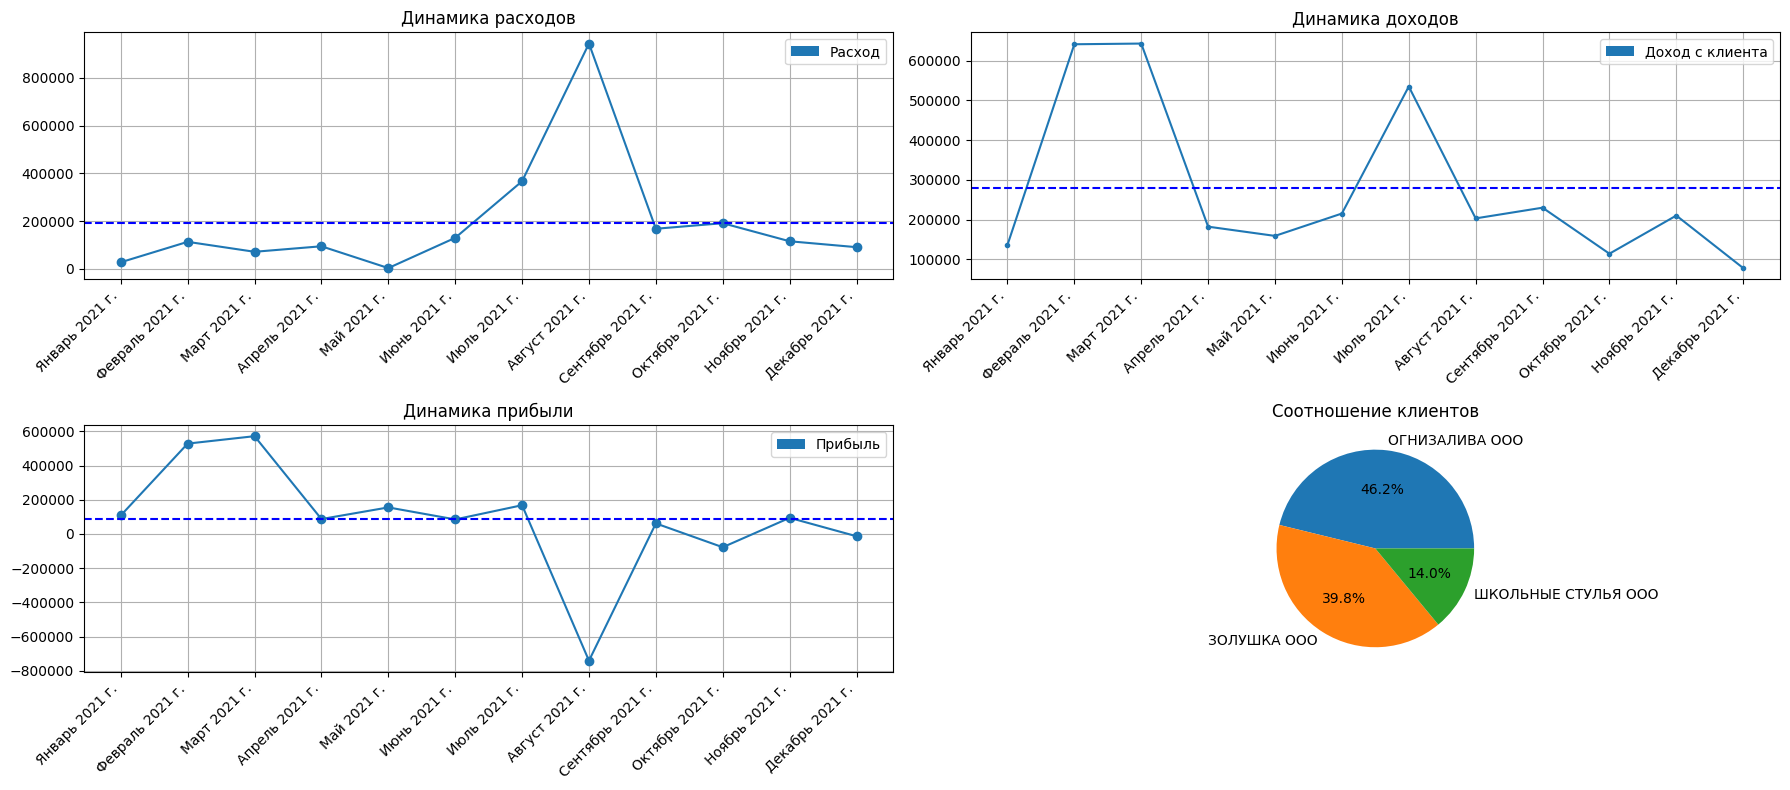

In [11]:
from typing import List, Any

import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import tkinter.filedialog

# Use if run on computer
from numpy import ndarray
from pandas import Series, DataFrame
from pandas.core.generic import NDFrame

# from google.colab import files
# uploaded = files.upload()
# from_filename = next(iter(uploaded))

# from_filename = tkinter.filedialog.askopenfilename()
# Use if run in Google Colab
from_filename = '/content/Отчет 2021 год полностью.txt'
txt_file_frame = pd.read_table(from_filename)
file_name_in_google_sheets = 'Profit'
path_of_file = from_filename[0:from_filename.rfind('/')]
constants_file = path_of_file + '/constants_for_readfile.txt'
constants_file_frame = pd.read_table(constants_file)


def get_clients_constants_list():
    '''() -> list of str

    Get list of clients.

    >>> get_clients_constants_list()
    ['ОГНИЗАЛИВА ООО', 'ЗОЛУШКА ООО', 'ШКОЛЬНЫЕ СТУЛЬЯ ООО', 'ПРОДТОВАРЫ ООО']
    '''

    clients_constants_list = []
    income_operations = 0
    k = 0

    for i in constants_file_frame['Поставщики']:
        if i == 'Операции дохода':
            income_operations = k
        k += 1

    for i in range(income_operations - 1):
        clients_constants_list.append(constants_file_frame['Поставщики'][i])

    return clients_constants_list


def get_all_transaction_types_list():
    '''() -> list of str

    Get list of all transaction.

    >>> get_all_transaction_types_list()
    ['От покупателя', 'Зарплата', 'Поставщику', 'Налоги', 'Прочее',
    'Комиссия банка']
    '''

    all_transaction_types_list = []
    income_operations = 0
    costs_operations = 0
    employees = 0
    k = 0

    for i in constants_file_frame['Поставщики']:
        if i == 'Операции дохода':
            income_operations = k
        if i == 'Операции расхода':
            costs_operations = k
        if i == 'Сотрудники':
            employees = k
        k += 1

    for i in range(income_operations + 1, employees):
        if i != costs_operations:
            all_transaction_types_list.append(constants_file_frame['Поставщики'][i])

    return all_transaction_types_list


def get_costs_names_list():
    '''() -> list of str

    Get list of all costs.

    >>> get_costs_names_list()
    ['Зарплата', 'Поставщику', 'Налоги', 'Прочее', 'Комиссия банка']
    '''

    costs_list = []
    costs_operations = 0
    employees = 0
    k = 0

    for i in constants_file_frame['Поставщики']:
        if i == 'Операции расхода':
            costs_operations = k
        if i == 'Сотрудники':
            employees = k
        k += 1

    for i in range(costs_operations + 1, employees):
        costs_list.append(constants_file_frame['Поставщики'][i])
    return costs_list


def get_employees_list():
    '''() -> list of str

    Get list of employees.

    >>> get_employees_list()
    ['Максимов Анрей Геннадьевич', 'Москвин Александр Игнатьевич',
    'Домаева Ольга Константинова', 'Седова Оксана Юрьевна']
    '''

    employees_constants_list = []
    employees = 0
    k = 0

    for i in constants_file_frame['Поставщики']:
        if i == 'Сотрудники':
            employees = k
        k += 1

    for i in range(employees + 1, constants_file_frame.size):
        employees_constants_list.append(constants_file_frame['Поставщики'][i])

    return employees_constants_list


# Wrote constants
clients_list = get_clients_constants_list()
costs_names_list = get_costs_names_list()
all_transactions_types_list = get_all_transaction_types_list()
employees_list = get_employees_list()

# Get names of columns in list
correct_column_names_list = []
for i in txt_file_frame.columns:
    if not 'Unnamed' in i:
        correct_column_names_list.append(i)

# Get strings indexes
correct_column_names_indexes_dict = {}
i = 0
for k in txt_file_frame[correct_column_names_list[0]]:
    correct_column_names_indexes_dict[k] = i
    i += 1

# Get length for new dictionaries
end_dict = 0
if 'За весь период' in correct_column_names_list:
    end_dict = len(correct_column_names_list) - 2  # If number of month > 1, delete "За весь период"
else:
    end_dict = len(correct_column_names_list) - 1


# Main functions
def find_income_data_dict():
    '''() -> dict of {str: float}

    Get dict of income data for every month

    >>> find_income_data_dict()
    {'Январь 2021 г.': 136130.0, 'Февраль 2021 г.': 191581.80000000005, 'Март 2021 г.': 204350.0,
    'Апрель 2021 г.': 182290.0, 'Май 2021 г.': 159000.0, 'Июнь 2021 г.': 215377.0,
    'Июль 2021 г.': 186195.0, 'Август 2021 г.': 203120.0, 'Сентябрь 2021 г.': 230064.0,
    'Октябрь 2021 г.': 114190.0, 'Ноябрь 2021 г.': 210259.0, 'Декабрь 2021 г.': 77989.0}
    '''

    income_dict = {}
    column_index = correct_column_names_indexes_dict['От покупателя']

    for i in range(end_dict):
        i += 1
        column_name = correct_column_names_list[i]
        new_item = txt_file_frame[column_name][column_index]
        if type(new_item) == str:
            new_item = float(new_item.replace('\xa0', '').replace(',', '.'))
        income_dict[column_name] = new_item
        if math.isnan(new_item):
            income_dict[column_name] = 0.0

    return income_dict


def find_costs_data_dict():
    '''() -> dict of {str: float}

    Get dict of costs data for every month

    >>> find_costs_data_dict()
    {'Январь 2021 г.': 27981.83, 'Февраль 2021 г.': 113525.22, 'Март 2021 г.': 71875.24,
    'Апрель 2021 г.': 94934.42, 'Май 2021 г.': 3682.84, 'Июнь 2021 г.': 130231.76999999999,
    'Июль 2021 г.': 59939.390000000014, 'Август 2021 г.': 98443.32999999996,
    'Сентябрь 2021 г.': 168248.02000000002, 'Октябрь 2021 г.': 191552.99,
    'Ноябрь 2021 г.': 115880.67, 'Декабрь 2021 г.': 91176.47}
    '''

    costs_dict = {}

    for item in all_transactions_types_list:
        column_index = correct_column_names_indexes_dict[item]
        if item == 'От покупателя':
            for i in range(end_dict):
                i += 1
                costs_dict[correct_column_names_list[i]] = 0.0
        else:
            for i in range(end_dict):
                i += 1
                column_name = correct_column_names_list[i]
                new_item = txt_file_frame[column_name][column_index]
                if type(new_item) == str:
                    new_item = float(new_item.replace('\xa0', '').replace(',', '.'))
                if not math.isnan(new_item):
                    costs_dict[column_name] = costs_dict[column_name] + new_item

    return costs_dict


def find_clients_ratio_dict():
    ''' () -> dict of {str: float}

    Get dict of clients ratio

    >>> find_clients_ratio_dict()
    {'ОГНИЗАЛИВА ООО': 1435886.8, 'ЗОЛУШКА ООО': 435499.0,
    'ШКОЛЬНЫЕ СТУЛЬЯ ООО': 122600.0, 'ПРОДТОВАРЫ ООО': 70000.0}
    '''

    clients_ratio_dict = {}
    column_name = correct_column_names_list[len(correct_column_names_list) - 1]

    for item in clients_list:
        if item in correct_column_names_indexes_dict:
            column_index = correct_column_names_indexes_dict[item]
            client_income = txt_file_frame[column_name][column_index]
            if type(client_income) == str:
                client_income = float(client_income.replace('\xa0', '').replace(',', '.'))
                clients_ratio_dict[item] = client_income
            if math.isnan(client_income):
                clients_ratio_dict[item] = 0.0

    return clients_ratio_dict


def find_all_costs_dict():
    '''() -> dict of {str: float}

    Get dict of all costs

    >>>find_all_costs_dict()
    {'Зарплата': 345159.16, 'Поставщику': 1698868.8, 'Налоги': 227321.05,
    'Прочее': 41102.72, 'Комиссия банка': 6984.46}
    '''

    all_costs_dict = {}
    column_name = correct_column_names_list[len(correct_column_names_list) - 1]

    for item in costs_names_list:
        column_index = correct_column_names_indexes_dict[item]
        cost = txt_file_frame[column_name][column_index]
        if type(cost) == str:
            cost = float(cost.replace('\xa0', '').replace(',', '.'))
            all_costs_dict[item] = cost
        if math.isnan(cost):
            all_costs_dict[item] = 0.0

    return all_costs_dict


def calculate_profit():
    ''' () -> dict of {str: float}

    Calculate profit for every month

    >>> calculate_profit()
    {'Январь 2021 г.': 108148.17, 'Февраль 2021 г.': 78056.58000000005,
    'Март 2021 г.': 132474.76, 'Апрель 2021 г.': 87355.58, 'Май 2021 г.': 155317.16,
    'Июнь 2021 г.': 85145.23000000001, 'Июль 2021 г.': 126255.60999999999,
    'Август 2021 г.': 104676.67000000004, 'Сентябрь 2021 г.': 61815.97999999998,
    'Октябрь 2021 г.': -77362.98999999999, 'Ноябрь 2021 г.': 94378.33,
    'Декабрь 2021 г.': -13187.470000000001}
    '''

    profit_dict = {}
    income_data_dict = find_income_data_dict()
    costs_data_dict = find_costs_data_dict()

    for item in income_data_dict:
        profit_dict[item] = income_data_dict[item] - costs_data_dict[item]

    return profit_dict


def draw_graphs():
    ''' () -> draw graphs

    Draw graphs:
    plot of costs,
    plot of income,
    plot of profit,
    pie of clients ratio

    >>> draw_graphs()
    '''

    plt.rcParams.update({'figure.autolayout': True})  # Располагаем график в границах
    fig, ax = plt.subplots(2, 2, figsize=(18, 8))

    group_data_costs = list(find_costs_data_dict().values())
    group_names_costs = list(find_costs_data_dict().keys())
    group_mean_costs = np.mean(group_data_costs)

    ax[0, 0].plot(group_names_costs, group_data_costs, 'o-', label='Расходы')

    labels = ax[0, 0].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax[0, 0].axhline(group_mean_costs, ls='--', color='b')

    costs_patch = mpatches.Patch(label='Расход')
    ax[0, 0].legend(handles=[costs_patch], loc='upper right')

    ax[0, 0].grid(True)

    ax[0, 0].set(title='Динамика расходов')

    group_data_income = list(find_income_data_dict().values())
    group_names_income = list(find_income_data_dict().keys())
    group_mean_income = np.mean(group_data_income)

    ax[0, 1].plot(group_names_income, group_data_income, '.-', label='Доходы')

    labels = ax[0, 1].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax[0, 1].axhline(group_mean_income, ls='--', color='b')

    income_patch = mpatches.Patch(label='Доход с клиента')
    ax[0, 1].legend(handles=[income_patch], loc='upper right')

    ax[0, 1].grid(True)

    ax[0, 1].set(title='Динамика доходов')

    group_data_profit = list(calculate_profit().values())
    group_names_profit = list(calculate_profit().keys())
    group_mean_profit = np.mean(group_data_profit)

    ax[1, 0].plot(group_names_profit, group_data_profit, 'o-', label='Прибыль')

    labels = ax[1, 0].get_xticklabels()
    plt.setp(labels, rotation=45, horizontalalignment='right')

    ax[1, 0].axhline(group_mean_profit, ls='--', color='b')

    profit_patch = mpatches.Patch(label='Прибыль')
    ax[1, 0].legend(handles=[profit_patch], loc='upper right')

    ax[1, 0].grid(True)

    ax[1, 0].set(title='Динамика прибыли')

    group_data_clients_income = list(find_clients_ratio_dict().values())
    group_names_clients_income = list(find_clients_ratio_dict().keys())

    ax[1, 1].pie([x * 100 for x in group_data_clients_income], labels=[x for x in group_names_clients_income],
                 autopct='%1.1f%%')

    ax[1, 1].set_title('Соотношение клиентов')

    plt.show()


def google_docs_saving_data():
    """() -> Google sheet

    Collect data to Google sheet.

    Precondition: Use this function only in Google Colab and change path of file in header of this code.

    >>>google_docs_saving_data()
    """

    from google.colab import auth
    auth.authenticate_user()

    import gspread
    from oauth2client.client import GoogleCredentials

    gc = gspread.authorize(GoogleCredentials.get_application_default())

    sh = gc.open(file_name_in_google_sheets)

    worksheet = sh.get_worksheet(0)

    list_for_file = []

    cell_list = worksheet.range('A1:I15')

    title_list = ['Доходы / Расходы']
    for i in correct_column_names_list:
        if i != 'Хоз. операция':
            title_list.append(i)
    list_for_file.append(title_list)

    for item in clients_list:
        clients_income_for_month_list = collect_data_for_google_docs(item)
        list_for_file.append(clients_income_for_month_list)

    list_for_file.append([])

    for item in employees_list:
        employees_expenses_for_month_list = collect_data_for_google_docs(item)
        list_for_file.append(employees_expenses_for_month_list)

    for item in costs_names_list:
        if item != 'Зарплата':
            costs_for_month_list = collect_data_for_google_docs(item)
            list_for_file.append(costs_for_month_list)

    list_for_file.append([])

    profit_for_month_list = ['Прибыль']
    for i in range(end_dict):
        i += 1
        column_name = correct_column_names_list[i]
        profit_for_month_list.append(calculate_profit()[column_name])
    all_profit_for_file = 0.0
    for i in range(len(profit_for_month_list) - 1):
        i += 1
        all_profit_for_file = all_profit_for_file + profit_for_month_list[i]
    profit_for_month_list.append(all_profit_for_file)
    list_for_file.append(profit_for_month_list)

    worksheet.update(list_for_file)


def collect_data_for_google_docs(item):
    '''(str) -> list of str and float

    Take item from list, find data for it in frame of data and return list of data.

    >>> collect_data_for_google_docs('Максимов Анрей Геннадьевич')
    ['Максимов Анрей Геннадьевич', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 70000.0, 70000.0, 70000.0, 70000.0, 280000.0]
    >>> collect_data_for_google_docs('ЗОЛУШКА ООО')
    ['ЗОЛУШКА ООО', 0.0, 0.0, 15100.0, 27000.0, 25000.0, 64747.0, 48200.0, 32990.0, 86984.0, 25000.0, 72459.0, 38019.0, 435499.0]
    '''
    collect_data_list = [item]
    column_index = correct_column_names_indexes_dict[item]

    for i in range(end_dict + 1):
        i += 1
        column_name = correct_column_names_list[i]
        new_item = txt_file_frame[column_name][column_index]
        if type(new_item) == str:
            new_item = float(new_item.replace('\xa0', '').replace(',', '.'))
        if math.isnan(new_item):
            new_item = 0.0
        collect_data_list.append(new_item)

    return collect_data_list


draw_graphs()